# IMDB Data of the top 1000 Movies & TV Shows

## Data Analytics Project

https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

This data set uses the IMDB rating system to get the top 1000 movies and tv shows. It has not been updated since 2020. 
The data has been extracted from IMDB

The format is as follows:

Poster_Link - Link of the poster that imdb using

Series_Title = Name of the movie

Released_Year - Year at which that movie released

Certificate - Certificate earned by that movie

Runtime - Total runtime of the movie

Genre - Genre of the movie

IMDB_Rating - Rating of the movie at IMDB site

Overview - mini story/ summary

Meta_score - Score earned by the movie

Director - Name of the Director

Star1,Star2,Star3,Star4 - Name of the Stars

Noofvotes - Total number of votes

Gross - Money earned by that movie

Importing the libraries needed to read in and plot the data

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

Reading the data from the csv file in ./data/daily_weather_data.csv

In [3]:
df = pd.read_csv("data/imdb_top_1000.csv")

# display the inital rows to check formatting
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [4]:
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

It can be seen the data set contains a lot of object types, while the rest are floats or ints. We will fix this for efficiency
Lets check if there are any null values or rows

In [5]:
# num of null values in each column
print(df.isnull().sum())

# total num of null values in all columns
print("Total null values ", np.sum([df.isnull()]))

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64
Total null values  427


There are a some null values (427 total) !
For the minute, we will drop the movies with mull values.

In [6]:
df = df.dropna()

df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,https://m.media-amazon.com/images/M/MV5BYjRmY2...,Giù la testa,1971,PG,157 min,"Drama, War, Western",7.6,A low-life bandit and an I.R.A. explosives exp...,77.0,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,"696,690"
991,https://m.media-amazon.com/images/M/MV5BMzAyND...,Kelly's Heroes,1970,GP,144 min,"Adventure, Comedy, War",7.6,A group of U.S. soldiers sneaks across enemy l...,50.0,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,"1,378,435"
992,https://m.media-amazon.com/images/M/MV5BMjAwMT...,The Jungle Book,1967,U,78 min,"Animation, Adventure, Family",7.6,Bagheera the Panther and Baloo the Bear have a...,65.0,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,"141,843,612"
994,https://m.media-amazon.com/images/M/MV5BZjQyMG...,A Hard Day's Night,1964,U,87 min,"Comedy, Music, Musical",7.6,"Over two ""typical"" days in the life of The Bea...",96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,"13,780,024"


Now all the rows containing atleast 1 NaN value are dropped
This leaves us with 714 rows

# Removing and chaning data
For the purposes of this project, the poster link is unnecessary, so it will be dropped in order to save memory. The Actors in the movies/tv shows are also listed in 4 seperate columns. This will be changed to a single column of an array of strings.

In [7]:
# remove Poster_Link
df = df.drop("Poster_Link", axis = 1)

# Concat each column of Star 1 - 4 into Actors column
df["Actors"] = df.apply(lambda row: [row["Star1"], row["Star2"], row["Star3"], row["Star4"]], axis=1)

# now drop star 1 - 4
df = df.drop(["Star1", "Star2", "Star3", "Star4"], axis = 1)

# We also don't use the overview, and therefore can remove it
df = df.drop("Overview", axis = 1)

df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross,Actors
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,2343110,"28,341,469","[Tim Robbins, Morgan Freeman, Bob Gunton, Will..."
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,1620367,"134,966,411","[Marlon Brando, Al Pacino, James Caan, Diane K..."
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,2303232,"534,858,444","[Christian Bale, Heath Ledger, Aaron Eckhart, ..."
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,1129952,"57,300,000","[Al Pacino, Robert De Niro, Robert Duvall, Dia..."
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,689845,"4,360,000","[Henry Fonda, Lee J. Cobb, Martin Balsam, John..."
...,...,...,...,...,...,...,...,...,...,...,...
990,Giù la testa,1971,PG,157 min,"Drama, War, Western",7.6,77.0,Sergio Leone,30144,"696,690","[Rod Steiger, James Coburn, Romolo Valli, Mari..."
991,Kelly's Heroes,1970,GP,144 min,"Adventure, Comedy, War",7.6,50.0,Brian G. Hutton,45338,"1,378,435","[Clint Eastwood, Telly Savalas, Don Rickles, C..."
992,The Jungle Book,1967,U,78 min,"Animation, Adventure, Family",7.6,65.0,Wolfgang Reitherman,166409,"141,843,612","[Phil Harris, Sebastian Cabot, Louis Prima, Br..."
994,A Hard Day's Night,1964,U,87 min,"Comedy, Music, Musical",7.6,96.0,Richard Lester,40351,"13,780,024","[John Lennon, Paul McCartney, George Harrison,..."


Now there are no unnecessary columns

The data types will be changed form objects to their correct format.

Keep in mind strings are fine as objects. Their object representation is due to NumPy, as strings are not fixed in length, and therefore not subject to 8,14,32,64 etc bytes.


Series_Title   :   object

Released_Year  :   object -> Int

Certificate :      object -> Category (Pandas)

Runtime   :        object -> Int (In Minutes)

Genre   :          object

IMDB_Rating  :    float64

Meta_score  :     float64

Director     :     object

No_of_Votes  :      int64

Gross        :     object -> Int

Actors      :      object



In [8]:
df.dtypes

# Released Year
# There is a certificate on row 966 instead of a year
df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors="coerce")
# drop the null rows created
df = df.dropna()
# Make column type int
df["Released_Year"] = df["Released_Year"].astype(int)


df["Genre"] = df["Genre"].str.split(", ")


# Certificate
# Make this a pandas category
df["Certificate"] = df["Certificate"].astype("category")

# Runtime
# remove min in string and convert to int
df["Runtime"] = df.apply(lambda row: row["Runtime"].replace(" min", ""), axis = 1)
df["Runtime"] = pd.to_numeric(df["Runtime"], errors="coerce")

# Gross
# Have to remove the commas in order to convert
df["Gross"] = df.apply(lambda row: row["Gross"].replace(",", ""), axis = 1)
df["Gross"] = pd.to_numeric(df["Gross"], errors="coerce")


df.dtypes

C:\Users\vkqwn\AppData\Local\Temp/ipykernel_1400/2994310661.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Released_Year"] = df["Released_Year"].astype(int)
C:\Users\vkqwn\AppData\Local\Temp/ipykernel_1400/2994310661.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Genre"] = df["Genre"].str.split(", ")
C:\Users\vkqwn\AppData\Local\Temp/ipykernel_1400/2994310661.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

Series_Title       object
Released_Year       int32
Certificate      category
Runtime             int64
Genre              object
IMDB_Rating       float64
Meta_score        float64
Director           object
No_of_Votes         int64
Gross               int64
Actors             object
dtype: object

## Plotting

Since the data is now cleaned, it can be plotted to look at various interesting trends

### IMDB Rating histogram

Ratings Histogram


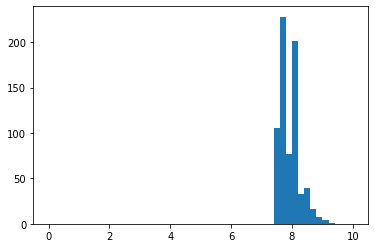

In [9]:
print("Ratings Histogram")
plt.hist(df["IMDB_Rating"], range = [0, 10], bins = 50)
plt.show()

In [10]:
print(df["IMDB_Rating"].min())
print(df["IMDB_Rating"].max())
print(df["IMDB_Rating"].mean())

7.6
9.3
7.9375876577840625


It is shown here that the average ratings seem to fall within 7 and 8. There are very few ratings above 8.75.
The minimum rating is 7.6, while the max is 9.3
The mean of the ratings is 7.93

### Metacritic rating histogram

Ratings Histogram


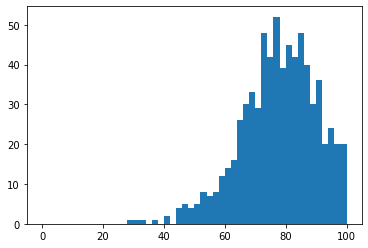

In [11]:
print("Ratings Histogram")
plt.hist(df["Meta_score"], range = [0, 100], bins = 50)
plt.show()

In [12]:
print(df["Meta_score"].min())
print(df["Meta_score"].max())
print(df["Meta_score"].mean())

28.0
100.0
77.15848527349229


We can see from the graph above that the metacritic ratings have much more variance, and with the values printed we can see the minimum score is 28, the max is 100, and the average is 77.16

#### Combining histograms
It would be interesting to overlay the histograms to see a trend.

In [69]:
print("Meta score")
print((df["Meta_score"] / 10).describe())

print("IMDB Rating")
print(df["IMDB_Rating"].describe())

Meta score
count    713.000000
mean       7.715849
std        1.240985
min        2.800000
25%        7.000000
50%        7.800000
75%        8.600000
max       10.000000
Name: Meta_score, dtype: float64
IMDB Rating
count    713.000000
mean       7.937588
std        0.293211
min        7.600000
25%        7.700000
50%        7.900000
75%        8.100000
max        9.300000
Name: IMDB_Rating, dtype: float64


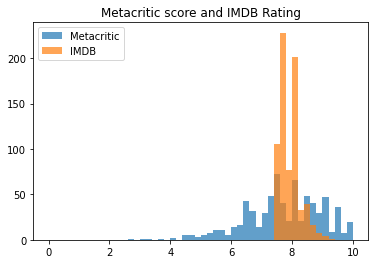

count    713.000000
mean      77.158485
std       12.409849
min       28.000000
25%       70.000000
50%       78.000000
75%       86.000000
max      100.000000
Name: Meta_score, dtype: float64

In [65]:
divmeta = df["Meta_score"] / 10
divmeta

plt.hist(divmeta, range = [0, 10], bins = 50, alpha = 0.7, label = "Metacritic")
plt.hist(df["IMDB_Rating"], range = [0, 10], bins = 50, alpha = 0.7, label = "IMDB")
plt.title("Metacritic score and IMDB Rating")
plt.legend()
plt.show()


## Genres
A look at the most common genres

<AxesSubplot:title={'center':'Genres by frequency'}>

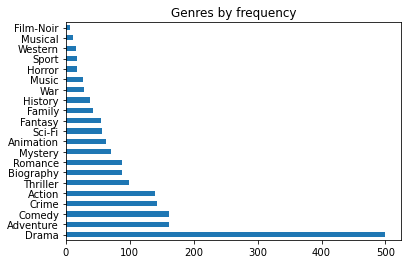

In [70]:
df_exp = df.explode("Genre")
df_exp["Genre"].value_counts().plot(title = "Genres by frequency", kind="barh")

This shows that the most common genre is Drama with almost 500, while Adventure is second with just over 150.

## Year released

Mean no of top movies per year :  8.695121951219512


Top 15 years for most top movies


<AxesSubplot:ylabel='Released_Year'>

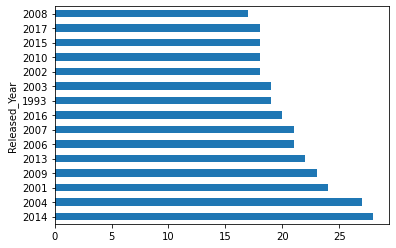

In [15]:
df_yr = df.groupby(["Released_Year"])
print("Mean no of top movies per year : ", df_yr.size().mean())
print("\n\nTop 15 years for most top movies")
df_yr.size().sort_values(ascending=False)[:15].plot(kind="barh")

In this graph, it's shown that the year with the most amount of released movies is 2014. The top 15 also have a similar number of movies, namely that they are all above 15, and most fall in the 2000s + range.

## Gross

Text(0, 0.5, 'val in millions')

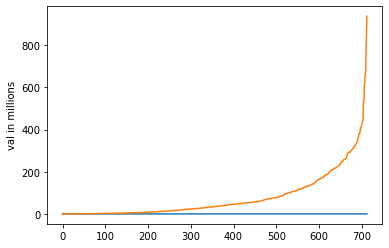

In [16]:
import matplotlib.ticker as ticker

sorted_gross = df.Gross.sort_values().reset_index()
# plt.plot(sorted_gross, label = "Gross")
# plt.show()
# sorted_gross

fig, ax = plt.subplots()
ax.plot(sorted_gross)
scale_y = 1e6
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)
ax.set_ylabel('val in millions')


This graph shows the gross of movies, which are sorted from ascending.From the graph, it seems that most movies actually grossed below 100 million, around only 150 grossed above that. The highest gross being above 800 million.

In [17]:
df.Gross.mean()

undt = df[df["Released_Year"] < 2000]
undt.Gross.mean()

56014783.20958084

## Hypothesis Test 1



Most of the movies are from 2014. Is the average gross of the top movies higher than the average gross of the movies that year?
(The average for 2014 domestically was 12,213,029, from https://www.boxofficemojo.com/year/)

H0 = The average gross of the top movies from 2014 is the same as the average of all movies from 2014

H1 = The average gross of the top movies from 2014 is different than the average of all movies from 2014

Alpha = 0.05

In [18]:
df_yr = df.groupby(["Released_Year"]).get_group(2014)
df_yr.Gross.mean()

# get the 1 sample t test, with the pop mean being the average gross of all 2014 movies
hypo = stats.ttest_1samp(a=df_yr.Gross, popmean=12213029)

print(hypo)
print("P-Value:", hypo.pvalue)

Ttest_1sampResult(statistic=4.472702692504097, pvalue=0.00012554882603707762)
P-Value: 0.00012554882603707762


### Result

From this result, we can see that the P-Value does not fall within our alpha. With this, we can assume that the gross of the top movies is different than the average of all movies that year. Therefore we reject the null hypothesis.

## Hypothesis Test 2

There is always talk of recent movie bias. That is, newer movies are sometimes rated higher, while ones that are older may fade or become obscure or dated. For this hypothesis test, there will be two samples. Movies older than 2000, and movies after or doing 2000. It will be tested whether their average metacritic score is the same.

H0 = The average metacritic score for movies released before 2000 is the same as those released after 2000
H1 = The average metacritic score for movies released before 2000 is different than those released after 2000

Alpha = 0.05

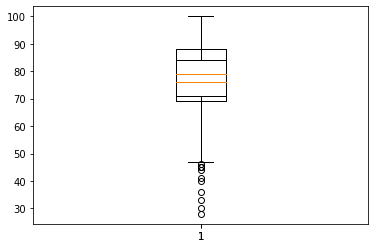

before 2000:  NormaltestResult(statistic=11.136024263824302, pvalue=0.003818062698819041)
After 2000:  NormaltestResult(statistic=41.943146905257294, pvalue=7.801199292396258e-10)


Ttest_indResult(statistic=3.7330643523970197, pvalue=0.0002046872251279605)

In [19]:
df_before2000 = df[df["Released_Year"] < 2000]
df_after2000 = df[df["Released_Year"] >= 2000]

plt.boxplot(df_before2000.Meta_score)
plt.boxplot(df_after2000.Meta_score)
plt.show()

# Since they both have a different variance, we will use Welch's T-Test
df_before2000["Meta_score"].var()
df_after2000["Meta_score"].var()

# The distrobutions are not normal, however the sample size is large enough that a 2 sample T test will be fine
print("before 2000: ", stats.normaltest(df_before2000["Meta_score"]))
print("After 2000: ", stats.normaltest(df_after2000["Meta_score"]))

stats.ttest_ind(df_before2000["Meta_score"], df_after2000["Meta_score"], equal_var = False)

### Result

From the tests above, the meta score is not normally distributed, however since the sample size for both are well above 100, which satisfies the often used n > 30 for the central limit theorem, and the data isn't massively skewered, a two sample T-Test is sufficient. Looking at the box plots, both data samples have a similar meta rating. Since both data sets have a different variance and sample size, Welch's T-Test is used to calculate the P-Value.

Using this method, a P-Value of 0.0002 is recieved. This means the null hypothesis is rejected, and shows that the average metacritic score significantly differs between movies before 2000 and after 2000.

## Hypothesis Test 3

Chi-Squared Test. For this test we check whether there is a correlation between the certificate and genre, which for this purpose we will use A, U/A, and U. 

A films are only able to be seen by 18+,

U/A films are 12 and up,

U films are family friendly.

For Genre, since some genres occur less than 5 in certain certificates, we will take the top 5 most common genres. 
These are Drama, Adventure, Crime, Action, Comedy.

#### Hypothesis:

H0: The genre and certificate rating have no relationship

H1: There is a relationship with genre and certificate rating

Alpha: 0.05

In [20]:
df_genres = df.explode("Genre")
df_genres["Genre"].value_counts()

# Get all movies with A, UA, or U rating
df_chi = df[df["Certificate"].isin(["A", "UA", "U"])]
df.dtypes

# explode genre data frame
df_chi = df_chi.explode("Genre")
df_chi = df_chi[df_chi["Genre"].isin(["Drama", "Adventure", "Crime", "Action", "Comedy"])]

# generate crosstab
crosstab = pd.crosstab(df_chi["Certificate"], df_chi["Genre"])
crosstab

stats.chi2_contingency(crosstab)

(108.08701743526764,
 9.410321815975342e-20,
 8,
 array([[ 40.45817246,  46.73616474,  37.66795367,  34.87773488,
         111.25997426],
        [ 39.41312741,  45.52895753,  36.69498069,  33.97683398,
         108.38610039],
        [ 36.12870013,  41.73487773,  33.63706564,  31.14543115,
          99.35392535]]))

### Result

From the Chi-Squared test, we can see that the P-Value is below 0.05, meaning the null hypothesis is rejected. There is therefore a relationship with the Certificate rating for A, U/A and U, and the genres Drama, Adventure, Crime, Action, and Comedy.

## Linear Regression

Looking at the scatter matrix:

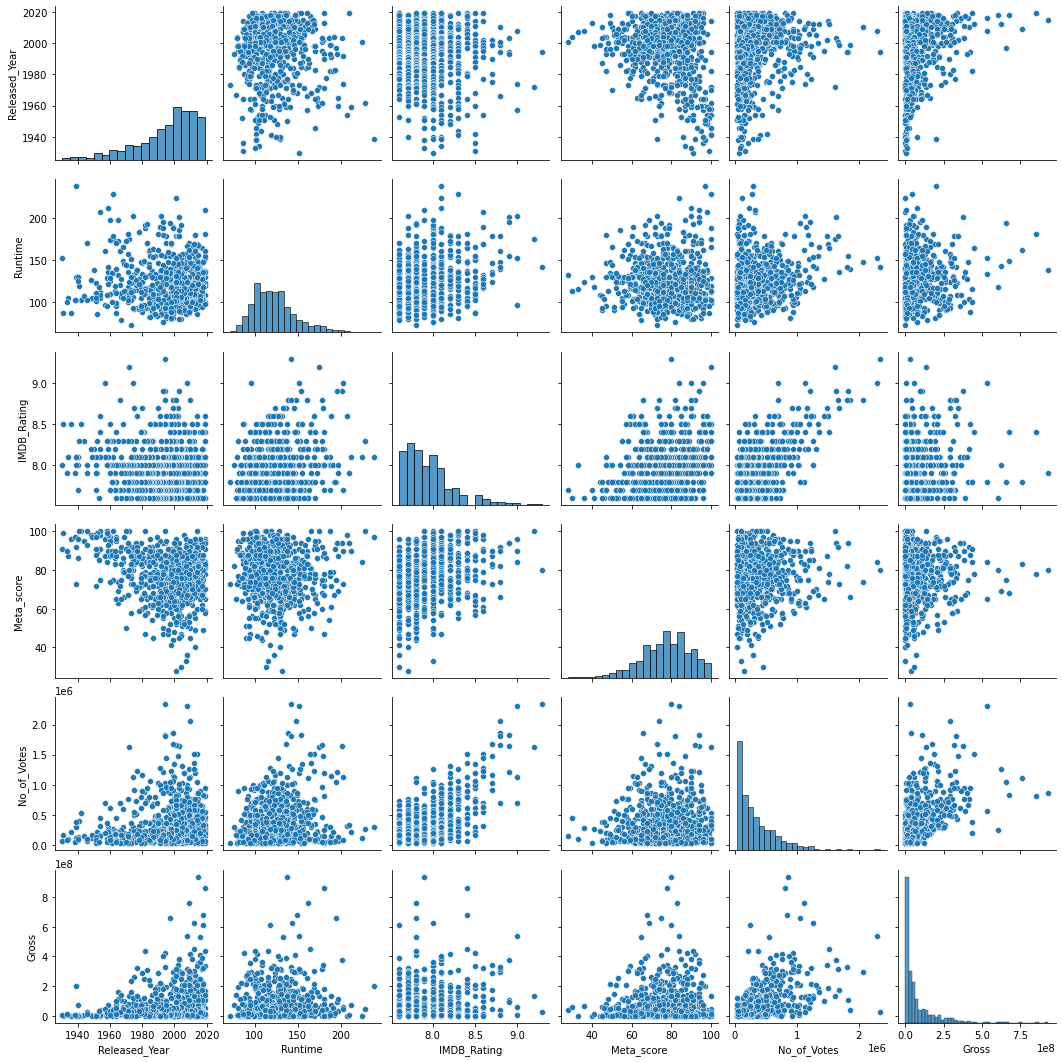

In [41]:
fig = sns.pairplot(data=df)

plt.show()

### Results

From the scatter matrix above, there seems to be a potential correlation with the IMDB Rating and the Number of Votes for a movie/TV show.

There also may be a slight correlation within the Released Year and the Gross of a movie/TV show.

The rest of the data does not seem to follow a linear structure at all.

Checking for multicollinearity

In [21]:
df.corr()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
Released_Year,1.000000,-0.017970,-0.176768,-0.272678,0.194857,0.234679
Runtime,-0.017970,1.000000,0.259552,-0.005708,0.213943,0.168261
IMDB_Rating,-0.176768,0.259552,1.000000,0.281135,0.623351,0.127510
Meta_score,-0.272678,-0.005708,0.281135,1.000000,0.029741,-0.014793
No_of_Votes,0.194857,0.213943,0.623351,0.029741,1.000000,0.545455
Gross,0.234679,0.168261,0.127510,-0.014793,0.545455,1.000000


## Correlation Test 1

Checking the correlation if the number of votes on an IMDB Rating has an effect on the IMDB Rating

                            OLS Regression Results                            
Dep. Variable:            IMDB_Rating   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     451.8
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           5.34e-78
Time:                        14:32:30   Log-Likelihood:                 38.929
No. Observations:                 713   AIC:                            -73.86
Df Residuals:                     711   BIC:                            -64.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.7537      0.012    635.952      

Text(0.5, 1.0, 'Linear Regression')

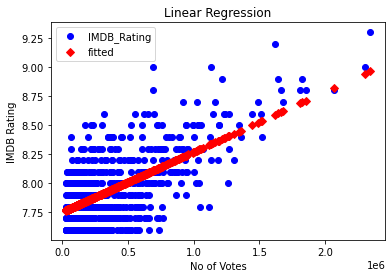

In [22]:
y = df["IMDB_Rating"]
X = df["No_of_Votes"]

statslr = sm.OLS(y,sm.add_constant(X)).fit()
print(statslr.summary())

# fig, ax = plt.subplots()

# # plot the residuals
# sns.histplot(x=model.resid, ax=ax, stat="density", linewidth=0, kde=True)
# ax.set(title="Distribution of residuals", xlabel="residual")

# # plot corresponding normal curve
# xmin, xmax = plt.xlim() # the maximum x values from the histogram above
# x = np.linspace(xmin, xmax, 100) # generate some x values
# p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
# sns.lineplot(x=x, y=p, color="orange", ax=ax)
# plt.show()

fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(statslr, "No_of_Votes", vlines=False, ax = ax);
ax.set_ylabel("IMDB Rating")
ax.set_xlabel("No of Votes")
ax.set_title("Linear Regression")

### Result


From the above summary and graph, we can conclude that there is not a strong correlation between the rating and the number of votes, however there may be a moderate correlation. The R-Squared value is 0.389, which is means that the independant variables explain 39% of variance in the dependant.


## Correlation 2

                            OLS Regression Results                            
Dep. Variable:                  Gross   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     41.44
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           2.24e-10
Time:                        16:06:56   Log-Likelihood:                -14225.
No. Observations:                 713   AIC:                         2.845e+04
Df Residuals:                     711   BIC:                         2.846e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.818e+09    4.5e+08     -6.263

Text(0.5, 1.0, 'Linear Regression')

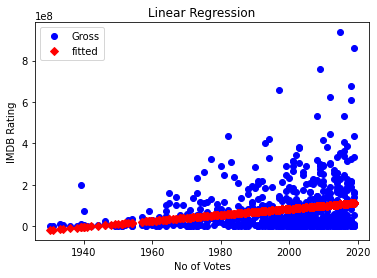

In [48]:
y = df["Gross"]
X = df["Released_Year"]

statslr = sm.OLS(y,sm.add_constant(X)).fit()
print(statslr.summary())

fig = sm.graphics.plot_fit(statslr, "Released_Year", vlines=False, ax = ax);
ax.set_ylabel("IMDB Rating")
ax.set_xlabel("No of Votes")
ax.set_title("Linear Regression")

### Results

The R-squared value is 0.055, meaning there is very little to no correlation betwen the Gross and Released Year. This is interesting, as even with inflation, there is so too much variance in Gross to predict it. The Durbin-Watson test shows that it is within the 1.5 - 2.5 range.

In [52]:
y = df["Meta_score"]
X = df[["Released_Year", "Runtime", "IMDB_Rating", "No_of_Votes", "Gross"]]

df_lin = df[["Meta_score", "Released_Year", "Runtime", "IMDB_Rating", "No_of_Votes", "Gross"]]
             
# scaler = StandardScaler()
# scalfit = scaler.fit_transform(df_lin)
# scalfit

# lr = LinearRegression()
# lr.fit(X,y)
# lr.coef_
# lr.intercept_

statslr = sm.OLS(df["No_of_Votes"],sm.add_constant(df["Runtime"])).fit()
statslr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            No_of_Votes   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     34.10
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           7.94e-09
Time:                        17:43:49   Log-Likelihood:                -10105.
No. Observations:                 713   AIC:                         2.021e+04
Df Residuals:                     711   BIC:                         2.022e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5599.2301   6.33e+04     -0.088      0.930    -1.3e+05    1.19e+05
Runtime     2925.4399    500.939      5.840      0.000    1941.943    3908.937
==============================================================================
Omnibus:                      254.650   Durbin-Watson:                   1.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              868.134
Skew:                           1.706   Prob(JB):                    3.07e-189
Kurtosis:                       7.193   Cond. No.                         617.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There are no strong correlations between the IVs.

In [53]:
y = df["Meta_score"]
X = df[["Released_Year", "Runtime", "IMDB_Rating", "No_of_Votes", "Gross"]]

df_lin = df[["Meta_score", "Released_Year", "Runtime", "IMDB_Rating", "No_of_Votes", "Gross"]]
             
# scaler = StandardScaler()
# scalfit = scaler.fit_transform(df_lin)
# scalfit

# lr = LinearRegression()
# lr.fit(X,y)
# lr.coef_
# lr.intercept_

statslr = sm.OLS(y,sm.add_constant(X)).fit()
statslr.summary()
#predictions = statslr.predict([75])
#predictions

# stats.probplot(model.resid, plot= plt)
# plt.title("")

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Meta_score   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     25.80
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           5.74e-24
Time:                        17:43:56   Log-Likelihood:                -2747.1
No. Observations:                 713   AIC:                             5506.
Df Residuals:                     707   BIC:                             5534.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           200.7569     58.911      3.408      0.001      85.096     316.417
Released_Year    -0.1251      0.026     -4.896      0.000      -0.175      -0.075
Runtime          -0.0397      0.017     -2.292      0.022      -0.074      -0.006
IMDB_Rating      16.7343      2.159      7.750      0.000      12.495      20.974
No_of_Votes   -7.906e-06   2.04e-06     -3.878      0.000   -1.19e-05    -3.9e-06
Gross           1.25e-08   4.75e-09      2.632      0.009    3.18e-09    2.18e-08
==============================================================================
Omnibus:                       52.202   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.193
Skew:                          -0.660   Prob(JB):                     1.90e-14
Kurtosis:                       3.620   Cond. No.                     1.91e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Testing using test-train

Using a split of 80/20 train/test, the model is checked to see accuracy

In [56]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)

trainlr = sm.OLS(y_train, sm.add_constant(x_train)).fit()
trainlr.summary()

y_prediction = trainlr.predict(sm.add_constant(x_test))
score=r2_score(y_test,y_prediction)
print('r2 score is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  0.09638062241987855
mean_sqrd_error is== 138.95319079882825
root_mean_squared error of is== 11.787840803082991
